 #  Evaluation of load disaggregation algorithms using NILMTK

## MOTIVATON

Building energy efficiency in residential and commercial sectors is a demand-side energy efficiency management mechanism. Improvements in energy efficiency of buildings is an important component of mitigatation of climate change. According to the Energy Information Adminstration (EIA) statistics, energy consumption by buildings in 2015 was 40% of the total energy consumption in the US [1]. Energy efficiency in buildings can be improved by having knowledge of the system: highest consumers, consumption trends. Insight into energy consumption can be obtained by using the data collected from these buildings. This insight can be used to identify opportunities for energy savings.  

Opportunities for energy saving directly translate to cost saving. This should be of special interest in the commercial buildings sector. In case of the residential sector, the major drawback to using the insight on consumption data to save costs is behavioral attitudes. Consumers generally forgo long-term benefits cost if presented by short term inconvenience. Also, apathy to climate change is another factor that contributes to indifference to energy saving mechanisms.

However, the datasets publicy-available are for residential energy consumption. Energy consumption trends in residential and commercial buildings may be different, but similar appliances will be used. We intend to use multiple datasets, run disaggregation algorithms on them and estimate appliance-level energy consumption. 

## INTRODUCTION

In recent years, there has been a lot of interest in non-intrusive load monitoring and load disaggregation of building energy data. One of the emerging efforts in this space is the development of the Non-Intrusive Load Monitoring Toolkit (NILMTK), an open source toolkit designed specifically for the application of meter energy data disaggregation [2]. There have been a number of research studies on this topic which have produced publicly available datasets of meter data. NILMTK is a step towards a development of a common platform to load, process, apply algorithms and evaluate the results on the various available public datasets.

For our project, we first show the NILMTK process pipeline on three datasets:

REDD (Reference Energy Disaggregation Dataset) : The first publicly available dataset collected specifically for NILM. 

IAWE (Indian data for Ambient Water and Electricity Sensing) : It contains both aggregate and sub-metered power data from a single house.

DRED (Dutch Residential Energy Dataset) : It contains data for energy consumption and occupany for a single house across different rooms. The dataset also has data for ambient conditions.

NILMTK has an inbuilt data converter framework which allows users to convert NILM datasets to binary format using Hierarchical Data Format (HD5). This is an efficient way of storing large volumes of data. The data converter outputs a HDF5 file which contains both the time series data from each meter as well as all relevant metadata.

An important feature on NILMTK is that once the data is imported, the labels are standardized acrooss different datasets. This is advantageous because different dataset use different labels for the same appliance.

## REDD  [3]

**Code for data conversion to HD5 format:**

REDD data is gathered across two frequencies 1 Hz and 15 kHz 

In [9]:
import nilmtk
import sip

The following code is for converting REDD data to hd5 format. 

In [10]:
#from nilmtk.dataset_converters import convert_redd
#convert_redd('C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project\low_freq', 'C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project/lowfreq_data')

NILMTK doesn't load the data by default to conserve memory. The following piece of code is for loading the data.

In [11]:
from nilmtk.utils import print_dict
from nilmtk import DataSet
redd = DataSet('C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project/lowfreq_data')

This REDD data consists of 6 houses. These are represented here by object 'building'

In [12]:
print_dict(redd.buildings)

In [13]:
print_dict(redd.buildings[1].metadata)

The 'elec' object is created to represent the electricty consumption of the 'building' object. Here, low frequency data (1Hz) is being imported and displayed.

In [14]:
redd = DataSet('C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project/lowfreq_data')
elec = redd.buildings[1].elec
print(elec)

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric 

In [15]:
# Reference for code block - NILMTK Github: nilmtk/docs/manual/user_guide/disaggregation_and_metrics.ipynb
# Link - https://github.com/nilmtk/nilmtk/blob/master/docs/manual/user_guide/disaggregation_and_metrics.ipynb

from __future__ import print_function, division
import time
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
rcParams['figure.figsize'] = (13, 6)
plt.style.use('ggplot')

from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore

C:\Users\Pranav\Anaconda3\envs\snakes\lib\site-packages\ipykernel\pylab\config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
C:\Users\Pranav\Anaconda3\envs\snakes\lib\site-packages\ipykernel\pylab\config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
C:\Users\Pranav\Anaconda3\envs\snakes\lib\site-packages\ipykernel\pylab\config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
C:\Users\Pranav\Anaconda3\envs\snakes\lib\site-packages\ipykernel\pylab\config.py:95: DeprecationWarning: metadata {'config': True} wa

A plot for the training data is given below

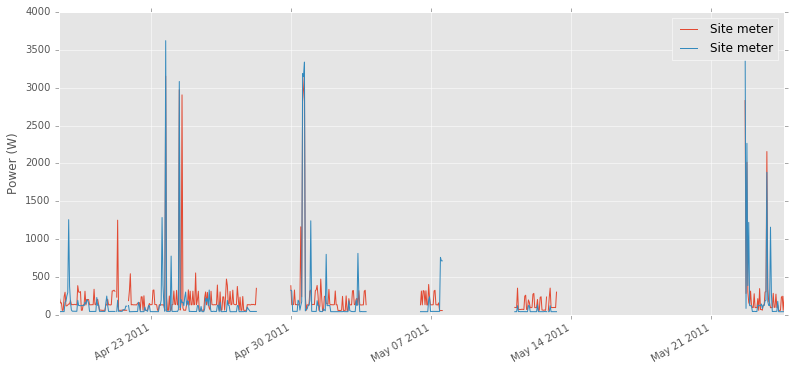

In [17]:
# Reference for code block - NILMTK Github: nilmtk/docs/manual/user_guide/disaggregation_and_metrics.ipynb
# Link - https://github.com/nilmtk/nilmtk/blob/master/docs/manual/user_guide/disaggregation_and_metrics.ipynb

train = DataSet('C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project/lowfreq_data')
test = DataSet('C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project/lowfreq_data')
building = 1
train.buildings[building].elec.mains().plot()

In [18]:
# Reference for code block - NILMTK Github: nilmtk/docs/manual/user_guide/disaggregation_and_metrics.ipynb
# Link - https://github.com/nilmtk/nilmtk/blob/master/docs/manual/user_guide/disaggregation_and_metrics.ipynb

train.set_window(end="30-4-2011")
test.set_window(start="30-4-2011")
train_elec = train.buildings[building].elec
test_elec = test.buildings[building].elec
train_elec.mains()
test_elec.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

Top five power conusming devices are identified and used for training disaggregarion algorithms. The sample period is downsized to 60 seconds.

In [19]:
# Reference for code block - NILMTK Github: nilmtk/docs/manual/user_guide/disaggregation_and_metrics.ipynb
# Link - https://github.com/nilmtk/nilmtk/blob/master/docs/manual/user_guide/disaggregation_and_metrics.ipynb

top_5_train_elec = train_elec.submeters().select_top_k(k=5)

15/16 MeterGroup(meters=
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
16/16 MeterGroup(meters=
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
Calculating total_energy for ElecMeterID(instance=20, building=1, dataset='REDD') ...   

c:\users\pranav\desktop\course material\fall 16\practical data science\nilmtk\nilmtk\metergroup.py:1301: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  top_k_series.sort(ascending=asc)


## Training and Disaggregation of data

NILMTK currently supports execution of two disaggregation algorithms:
1. Comninatorial optimization
2. FHMM(Factorial Hidden Markov Model)

In [20]:
# Reference for code block - NILMTK Github: nilmtk/docs/manual/user_guide/disaggregation_and_metrics.ipynb
# Link - https://github.com/nilmtk/nilmtk/blob/master/docs/manual/user_guide/disaggregation_and_metrics.ipynb

from nilmtk.disaggregate import fhmm_exact
from nilmtk import TimeFrame, MeterGroup, HDFDataStore
import time
start = time.time()
fhmm = fhmm_exact.FHMM()
fhmm.train(top_5_train_elec, sample_period=60)
end = time.time()
print("Runtime =", end-start, "seconds.")

Training model for submeter 'ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])'
Training model for submeter 'ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])'
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])'
Training model for submeter 'ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])'
Runtime = 21.381000042 seconds.


The  code for disaggregatating the data is in the appenix (entry 1). The back-end code for the following piece has a bug, which we tried to fix. Jack Kelly, one of the developers of the NILM tool-kit acknowledged our issue but could not provide a solution due to other commitments.

## IAWE [4]

IAWE dataset contains data for 73 days during Summer 2013 from a home in Delhi, India. The electricty consumption, water use and ambient temperature are monitored.

The code for converting the iawe data to h5 format is in the appendix (entry 2).

In [26]:
from nilmtk import DataSet

iawe = DataSet(r'C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project/iawe.h5')
elec = iawe.buildings[1].elec
print(elec)

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='iAWE', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='iAWE', site_meter, appliances=[])
  ElecMeter(instance=3, building=1, dataset='iAWE', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=4, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=1)])
  ElecMeter(instance=5, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=2)])
  ElecMeter(instance=6, building=1, dataset='iAWE', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=7, building=1, dataset='iAWE', appliances=[Appliance(type='computer', instance=1)])
  ElecMeter(instance=8, building=1, dataset='iAWE', appliances=[Appliance(type='clothes iron', instance=1)])
  ElecMeter(instance=9, building=1, dataset='iAWE', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=10, building=1, dataset='iAWE', appliances=[A

We train the IAWE data just like the REDD data

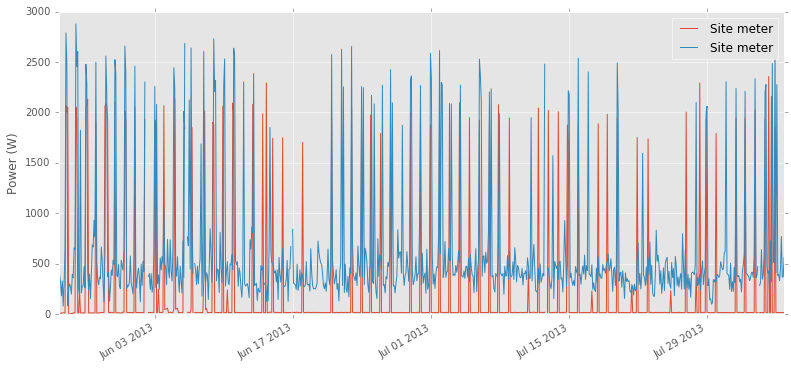

In [27]:
train = DataSet(r'C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project/iawe.h5')
test = DataSet(r'C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project/iawe.h5')

building = 1

train.buildings[building].elec.mains().plot()


## DRED [5]

The data in DRED dataset was collected from July 05, 2015 to Dec 05, 2015. DRED is the first publicy-available dataset from the Netherlands. 

The dataset includes:

Electricity monitoring: Aggregated and appliance level energy consumption.

Occupancy information: Room-level information of occupants based on WiFi and Bluetooth data

Ambient information: Room-level indoor temperature, outdoor temperature. Ambient conditions like windspeed, humidity and precipitation.

Household informatiom: Layout of the house and Appliance location based on room.

In [45]:
%matplotlib inline
from pylab import rcParams
import matplotlib.pyplot as plt

#import nilmtk.sensors.temperature as ntemp
import nilmtk as ntk
import nilmtk.disaggregate as ntkd
import nilmtk.metrics as ntkm
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Temperature_data.csv')

rcParams['figure.figsize'] = (14, 6)
plt.style.use('ggplot')

In [33]:
h5_path = 'DRED.h5'
dred = ntk.DataSet(h5_path)

In [34]:
elec = dred.buildings[1].elec
mains = elec.mains()


The following code is used to parse outdoor temperature data.

In [63]:
df1 = df[df["Location"] == "Outside"]
df1['Time'] = pd.to_datetime(df1['Time'], format="%Y-%m-%d %H:%M:%S")
df2 = df1.drop(['BeaconId'], axis = 1)
df2 = df2.drop(['Location'], axis = 1)
df2.tail(3)
df2['Time'] = pd.to_datetime(df2['Time'])
df2.index = df2['Time']
df3 = df2.resample('W').mean()

C:\Users\Pranav\Anaconda3\envs\snakes\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Time,Temperature
920806,2015-11-29 14:17:04,10
920825,2015-11-29 14:47:04,10
920862,2015-11-29 14:51:04,10


Energy consumption for the fridge, electric heating element, fan, cooker, television and washing machine is plotted. 

From the plot we can see that fridge load is steady through the time period. 

The plots for television, cooker and washing machine are not intuitive. They merely represent the lifestyle of the occupants or the occupancy during the period.

The electric heating element is in use even while the cooker and television are not. This could be an indication that the heating was centrally controlled outside the preference or control of the occupants. 


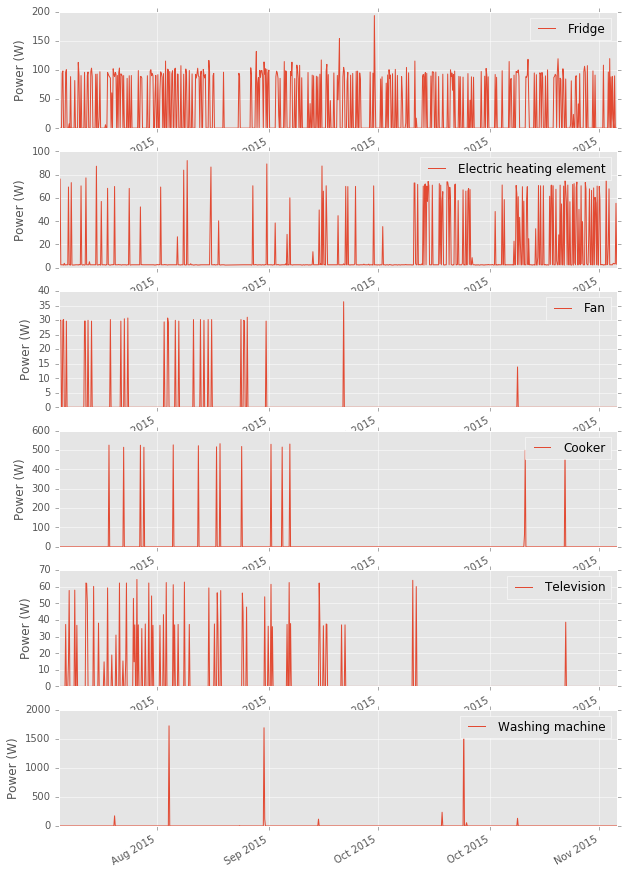

In [37]:
plt.figure(figsize=(10,30))
plt.subplot(11,1,1)
elec['fridge'].plot()
plt.subplot(11,1,2)
elec['electric heating element'].plot()
plt.subplot(11,1,3)
elec['fan'].plot()
plt.subplot(11,1,4)
elec['cooker'].plot()
plt.subplot(11,1,5)
elec['television'].plot()
plt.subplot(11,1,6)
elec['washing machine'].plot()

Temperature data from July to December is plotted below. As expected, a fairly steady temperature drop is observed.

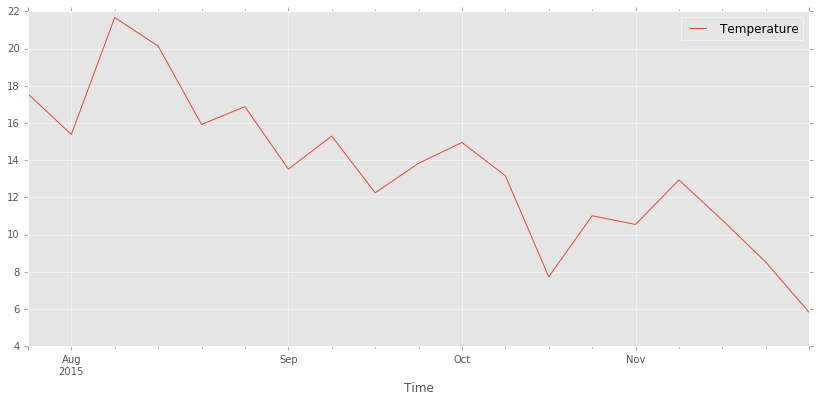

In [56]:
heat = elec["electric heating element"]
fan = elec["fan"]

df3.plot()

The plot below is the energy consumption by the electric heating element. As expected, the consumption inreases at the end of the year when the ambient temperature drops. 

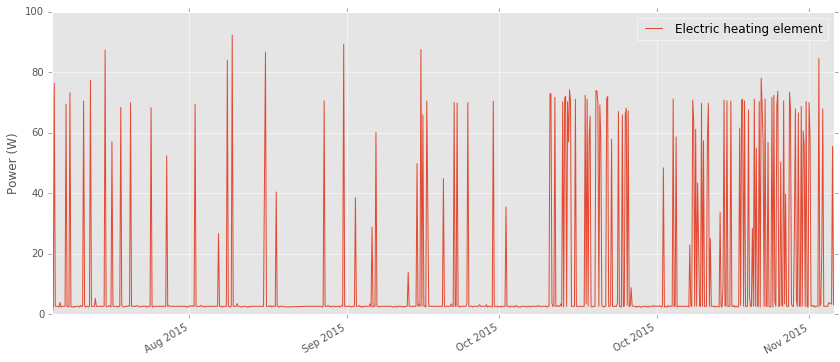

In [57]:
heat.plot()

The plot below is the energy consumption by the fan. As expected, the consumption decreases at the end of the year when the ambient temperature drops. This is when the heating element is used. The fan and heating element are primarily used at different times. plot above is the energy consumption by the electric heating element. As expected, the consumption inreases at the end of the year when the ambient temperature drops.

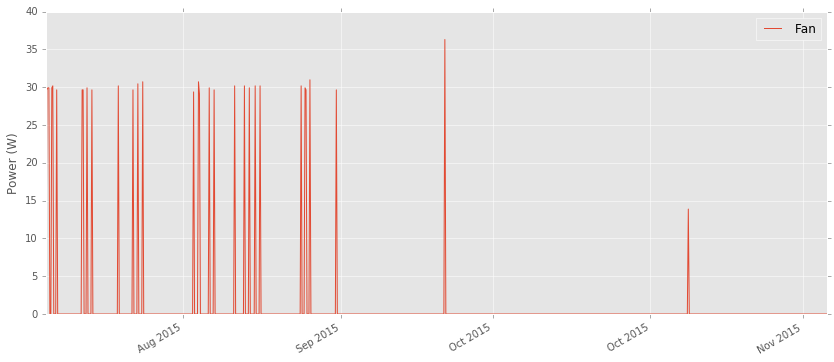

In [58]:
fan.plot()

## INTENDED WORK

Our intended plan was to use the DRED data (over 6 months), disaggregate energy consumption and then predict appliance level energy consumption.

We planned to disaggregate the total energy consumption into appliance-level consumption using the real power data from DRED. The pre-defined disaggregaation algorithms from NILMTk, namely: Factoral Hidden Markov Modl (FHMM) and Combinatorial Optimization (CO) would be used. 

We would choose a particular appliance to evaluate the disaggregation alorithm and the prediction model.

The disaggregated data would be divided into three part: training (4 month data), validation (1 month data) and testing (1 month data). We would use regression to model the data, validate it and finally test it.

The appliance level data from the DRED dataset would be used to determine the accuracy of the disaggregation alorithms. Results of the prediction on the test data would be compared with the actual energy consumption data.

We selected fan and electric heating element as the appliances to be evaluated. Energy consumption of these  appliances is a function of the ambient temperature. Due to the nature of the data available, results of this study would yield insight about accuracy of predction of energy consumption of devices dependent on temperature.

Results of this study would give insight regarding the accuracy of predictions made using disaggregated data. Organizations working with smart-thermostats or smart-meters can use this make this data available to consumers as a service to help them better manage their energy bills. 

## PLAID 

## REFERENCES

[1] US Energy Information Administration (EIA), Independent Statistics and Analysis, FAQs

Link: http://www.eia.gov/tools/faqs/faq.cfm?id=86&t=1


[2] Publication -  Nipun Batra, Jack Kelly, Oliver Parson, Haimonti Dutta, William Knottenbelt, Alex Rogers, Amarjeet Singh, Mani Srivastava. NILMTK: An Open Source Toolkit for Non-intrusive Load Monitoring. In: 5th International Conference on Future Energy Systems (ACM e-Energy), Cambridge, UK. 2014. 

Link: http://nilmtk.github.io/


[3] The Reference Energy Disaggregation Data Set (REDD)

Link: http://iawe.github.io/


[4] Indian Dataset for Ambient Water and Energy (IAWE)

Link: http://iawe.github.io/


[5] Dutch Residential Energy Disaggregation (DRED)

Link: http://www.st.ewi.tudelft.nl/~akshay/dred/

## APPENDIX

### 1] Disaggregation algorithms using REDD dataset

The follwoing code is used for disagregating the data using the algorithm FHMM (Factoral Hidden Markov Model)

The f-score (harmonic mean of precision and recall) for FHMM for the top 5 energy consiming appliances is then plotted.

Precision being the fraction of time slices in which an appliance was correctly predicted to be on that it was actually off.
Recall is the fraction of time slices in which the appliance was correctly predicted to be on that it was actually on. 

In [64]:
# Reference for code block - NILMTK Github: nilmtk/docs/manual/user_guide/disaggregation_and_metrics.ipynb
# Link - https://github.com/nilmtk/nilmtk/blob/master/docs/manual/user_guide/disaggregation_and_metrics.ipynb

#disag_filename = ('C:\Users\Pranav\Desktop\Course material\Fall 16\Practical Data Science\Project/redd-disag-fhmm.h5')
#output = HDFDataStore(disag_filename, 'w')
#fhmm.disaggregate(test_elec.mains(), output, sample_period=60)
#output.close()

#disag_fhmm = DataSet(disag_filename)
#disag_fhmm_elec = disag_fhmm.buildings[building].elec

#from nilmtk.metrics import f1_score
#f1_fhmm = f1_score(disag_fhmm_elec, test_elec)
#f1_fhmm.index = disag_fhmm_elec.get_labels(f1_fhmm.index)
#f1_fhmm.plot(kind='barv')
#plt.ylabel('appliance');
#plt.xlabel('f-score');
#plt.title("FHMM");

### 2] Converting IAWE data to h5 format

In [ ]:
# Reference for code block - NILMTK Github: Source code for nilmtk.dataset_converters.iawe.convert_iawe
# link - http://nilmtk.github.io/nilmtk/master/_modules/nilmtk/dataset_converters/iawe/convert_iawe.html#convert_iawe

from __future__ import print_function, division
import pandas as pd
import numpy as np
from os.path import join, isdir, isfile, dirname, abspath
from os import getcwd
from sys import getfilesystemencoding
from nilmtk.datastore import Key
from nilmtk.measurement import LEVEL_NAMES
from nilmtk.utils import check_directory_exists, get_datastore
from nilm_metadata import convert_yaml_to_hdf5
from inspect import currentframe, getfile, getsourcefile
from copy import deepcopy

def reindex_fill_na(df, idx):
    df_copy = deepcopy(df)
    df_copy = df_copy.reindex(idx)

    power_columns = [
        x for x in df.columns if x[0] in ['power']]
    non_power_columns = [x for x in df.columns if x not in power_columns]

    for power in power_columns:
        df_copy[power].fillna(0, inplace=True)
    for measurement in non_power_columns:
        df_copy[measurement].fillna(
            df[measurement].median(), inplace=True)

    return df_copy


column_mapping = {
    'frequency': ('frequency', ""),
    'voltage': ('voltage', ""),
    'W': ('power', 'active'),
    'energy': ('energy', 'apparent'),
    'A': ('current', ''),
    'reactive_power': ('power', 'reactive'),
    'apparent_power': ('power', 'apparent'),
    'power_factor': ('pf', ''),
    'PF': ('pf', ''),
    'phase_angle': ('phi', ''),
    'VA': ('power', 'apparent'),
    'VAR': ('power', 'reactive'),
    'VLN': ('voltage', ""),
    'V': ('voltage', ""),
    'f': ('frequency', "")
}

TIMESTAMP_COLUMN_NAME = "timestamp"
TIMEZONE = "Asia/Kolkata"
START_DATETIME, END_DATETIME = '7-13-2013', '8-4-2013'
FREQ = "1T"


def convert_iawe(iawe_path, output_filename, format="HDF"):
    """
    Parameters
    ----------
    iawe_path : str
        The root path of the iawe dataset.
    output_filename : str
        The destination filename (including path and suffix).
    """

    check_directory_exists(iawe_path)
    idx = pd.DatetimeIndex(start=START_DATETIME, end=END_DATETIME, freq=FREQ)
    idx = idx.tz_localize('GMT').tz_convert(TIMEZONE)

    # Open data store
    store = get_datastore(output_filename, format, mode='w')
    electricity_path = join(iawe_path, "electricity")

    # Mains data
    for chan in range(1, 12):
        key = Key(building=1, meter=chan)
        filename = join(electricity_path, "%d.csv" % chan)
        print('Loading ', chan)
        df = pd.read_csv(filename)
        df.drop_duplicates(subset=["timestamp"], inplace=True)
        df.index = pd.to_datetime(df.timestamp.values, unit='s', utc=True)
        df = df.tz_convert(TIMEZONE)
        df = df.drop(TIMESTAMP_COLUMN_NAME, 1)
        df.rename(columns=lambda x: column_mapping[x], inplace=True)
        df.columns.set_names(LEVEL_NAMES, inplace=True)
        df = df.convert_objects(convert_numeric=True)
        df = df.dropna()
        df = df.astype(np.float32)
        df = df.sort_index()
        df = df.resample("1T")
        df = reindex_fill_na(df, idx)
        assert df.isnull().sum().sum() == 0
        store.put(str(key), df)
    store.close()
    convert_yaml_to_hdf5(join(_get_module_directory(), 'metadata'),
                         output_filename)

    print("Done converting iAWE to HDF5!")


def _get_module_directory():
    # Taken from http://stackoverflow.com/a/6098238/732596
    path_to_this_file = dirname(getfile(currentframe()))
    if not isdir(path_to_this_file):
        encoding = getfilesystemencoding()
        path_to_this_file = dirname(unicode(__file__, encoding))
    if not isdir(path_to_this_file):
        abspath(getsourcefile(lambda _: None))
    if not isdir(path_to_this_file):
        path_to_this_file = getcwd()
    assert isdir(path_to_this_file), path_to_this_file + ' is not a directory'
    return path_to_this_file
